In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('kaggle kernels output drsachingupta/drift-concept-on-electricity-dataset -p /path/to/dest'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [ ]:
import re

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [ ]:
electricity_info = pd.read_csv("/content/electricity.csv")

In [ ]:
electricity_info.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [ ]:
electricity_info["class_code"] = np.where(electricity_info["class"].str.contains("UP"), 1, 0)

In [ ]:
electricity_info.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class_code
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,4.003178,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526,0.424545
std,0.340308,1.998695,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,2.000000,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912,0.000000
50%,0.456329,4.000000,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912,0.000000
75%,0.880547,6.000000,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702,1.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
!pip install -U scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skmultiflow.drift_detection.adwin import ADWIN
 
adwin = ADWIN()

In [ ]:
data_stream = electricity_info["class_code"]

In [ ]:
previous_variance = 0
for i in range(45312):
    adwin.add_element(data_stream[i])
    if adwin.detected_change():
        print("Change detected in value {}, at index {}".format(data_stream[i], i))
        print("Current variance: {}. Previous variance {}".format(adwin.variance, previous_variance))
    previous_variance = adwin.variance

Change detected in value 0, at index 1151
Current variance: 0.49012756347656283. Previous variance 0.24750434216157763
Change detected in value 0, at index 1183
Current variance: 0.5140907118055559. Previous variance 0.4757778027905813
Change detected in value 1, at index 1599
Current variance: 0.41001892089843756. Previous variance 0.3672716012296745
Change detected in value 1, at index 2239
Current variance: 0.39999201268325646. Previous variance 0.3353314779539203
Change detected in value 1, at index 2271
Current variance: 0.4384460729453629. Previous variance 0.39580366476621126
Change detected in value 0, at index 2303
Current variance: 0.5556972887389058. Previous variance 0.43634938480105717
Change detected in value 1, at index 4031
Current variance: 0.4235420227050788. Previous variance 0.34153959950788637
Change detected in value 1, at index 4159
Current variance: 0.6197464367574909. Previous variance 0.4121921026555695
Change detected in value 1, at index 4223
Current varianc

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

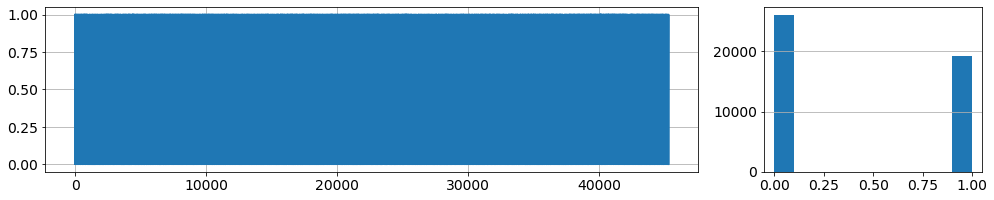

In [ ]:
def plot_data(data_stream, drifts=None):
    fig = plt.figure(figsize=(14,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(data_stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(data_stream, label=r'$data_stream$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(data_stream)

In [ ]:
!pip install river

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.3 MB/s 


Change detected at index 1151
Change detected at index 1855
Change detected at index 3199
Change detected at index 3583
Change detected at index 4095
Change detected at index 4543
Change detected at index 5535
Change detected at index 6559
Change detected at index 6911
Change detected at index 7039
Change detected at index 7391
Change detected at index 8383
Change detected at index 8799
Change detected at index 9055
Change detected at index 9535
Change detected at index 9951
Change detected at index 10399
Change detected at index 10879
Change detected at index 11167
Change detected at index 11615
Change detected at index 11871
Change detected at index 12255
Change detected at index 12799
Change detected at index 13599
Change detected at index 14175
Change detected at index 15007
Change detected at index 15391
Change detected at index 15999
Change detected at index 16255
Change detected at index 16447
Change detected at index 16767
Change detected at index 17311
Change detected at index

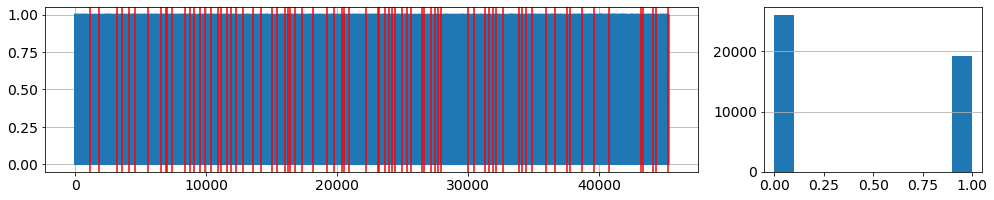

In [ ]:
import river
from river import drift

drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(data_stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.change_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        drift_detector.reset()   # As a best practice, we reset the detector

plot_data(data_stream, drifts)

In [ ]:
data_stream2 = electricity_info["nswprice"]

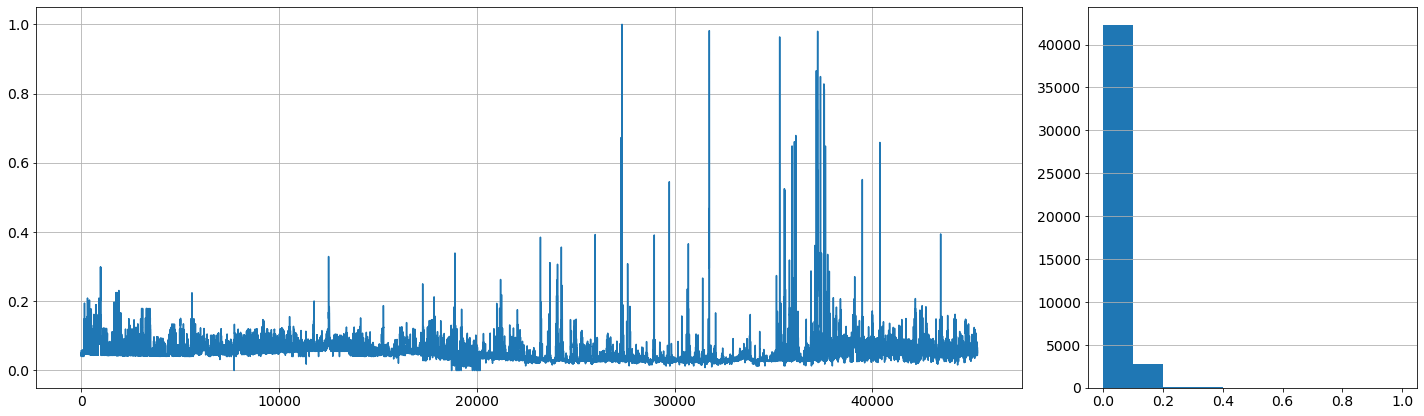

In [ ]:
def plot_data(data_stream2, drifts=None):
    fig = plt.figure(figsize=(20,6), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(data_stream2, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(data_stream2, label=r'$data_stream2$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(data_stream2)

Change detected at index 1023
Change detected at index 2815
Change detected at index 4863
Change detected at index 8895
Change detected at index 15615
Change detected at index 19423
Change detected at index 27359
Change detected at index 35967
Change detected at index 37247
Change detected at index 38527
Change detected at index 43327


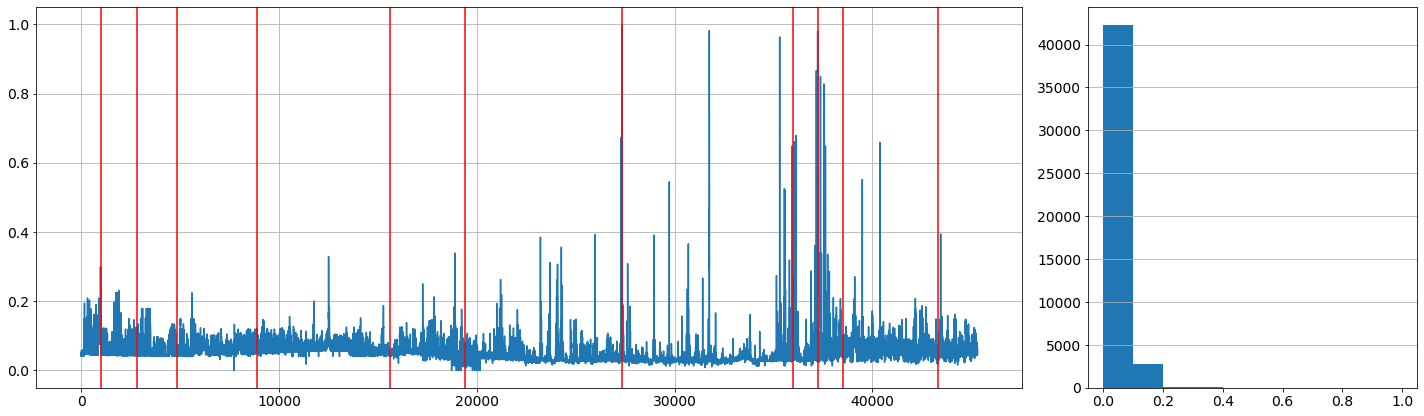

In [ ]:
from river import drift

drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(data_stream2):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.change_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        drift_detector.reset()   # As a best practice, we reset the detector

plot_data(data_stream2, drifts)

In [ ]:
previous_variance = 0
for i in range(45312):
    adwin.add_element(data_stream2[i])
    if adwin.detected_change():
        print("Change detected in value {}, at index {}".format(data_stream2[i], i))
        print("Current variance: {}. Previous variance {}".format(adwin.variance, previous_variance))
    previous_variance = adwin.variance

Change detected in value 0.128438, at index 703
Current variance: 2.038567179115401. Previous variance 1.1398825230798497
Change detected in value 0.043683, at index 1567
Current variance: 3.0383491900062825. Previous variance 1.757712890913879
Change detected in value 0.07878, at index 1727
Current variance: 3.385552993402376. Previous variance 2.9049150733670728
Change detected in value 0.120001, at index 1823
Current variance: 3.9056389822785733. Previous variance 3.2844254093123166
Change detected in value 0.075417, at index 2751
Current variance: 3.3658967500799633. Previous variance 2.8983109289984483
Change detected in value 0.050498, at index 8991
Current variance: 1.2440074565956076. Previous variance 1.1116327185034316
Change detected in value 0.303951, at index 37567
Current variance: 0.31629903216425487. Previous variance 0.281196784674299
